In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')

In [22]:
%matplotlib inline

In [3]:
from os.path import join

In [4]:
import matplotlib
matplotlib.use('Agg')
sns.set(rc={'text.usetex' : True})

In [5]:
matplotlib.rcParams['font.family'] = 'sans-serif'

In [6]:
DATA = "/Users/rdora/breast_cancer/data"
FIG = '/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/'

In [7]:
df_real = pd.read_csv(join(DATA, 'netparams_tidy.csv'))

In [41]:
df_sbm = pd.read_csv(join(DATA, 'sbm_netparams.csv'),
                    names=['Tissue',
                           'Layer',
                           'Mean Deg',
                           'Std Deg',
                           'D.A',
                           'A.A',
                           'Size'])

In [42]:
df_sbm = df_sbm.replace({'healthy': 'Healthy',
                        'luma': 'Lum A',
                        'lumb': 'Lum B',
                        'her2': 'Her2',
                        'basal': 'Basal'})

In [19]:
df_sbm = pd.melt(df_sbm, value_vars=['Mean Deg',
                            'Std Deg',
                            'D.A',
                            'A.A',
                            'Size'],
                var_name='Param',
                value_name='Value',
                id_vars=['Tissue', 'Layer'])

In [44]:
real = pd.read_csv(join(DATA, 'net_params_clean.csv'))

# Compare both

In [21]:
colors = ['#6aabd1', '#b63b2e', '#363441', '#ab9b93', '#abd16a']
pal = sns.color_palette(colors)

sns.palplot(pal)

In [23]:
hue_order = ["Healthy",
            "Lum A",
            "Lum B",
            "Her2",
            "Basal"]

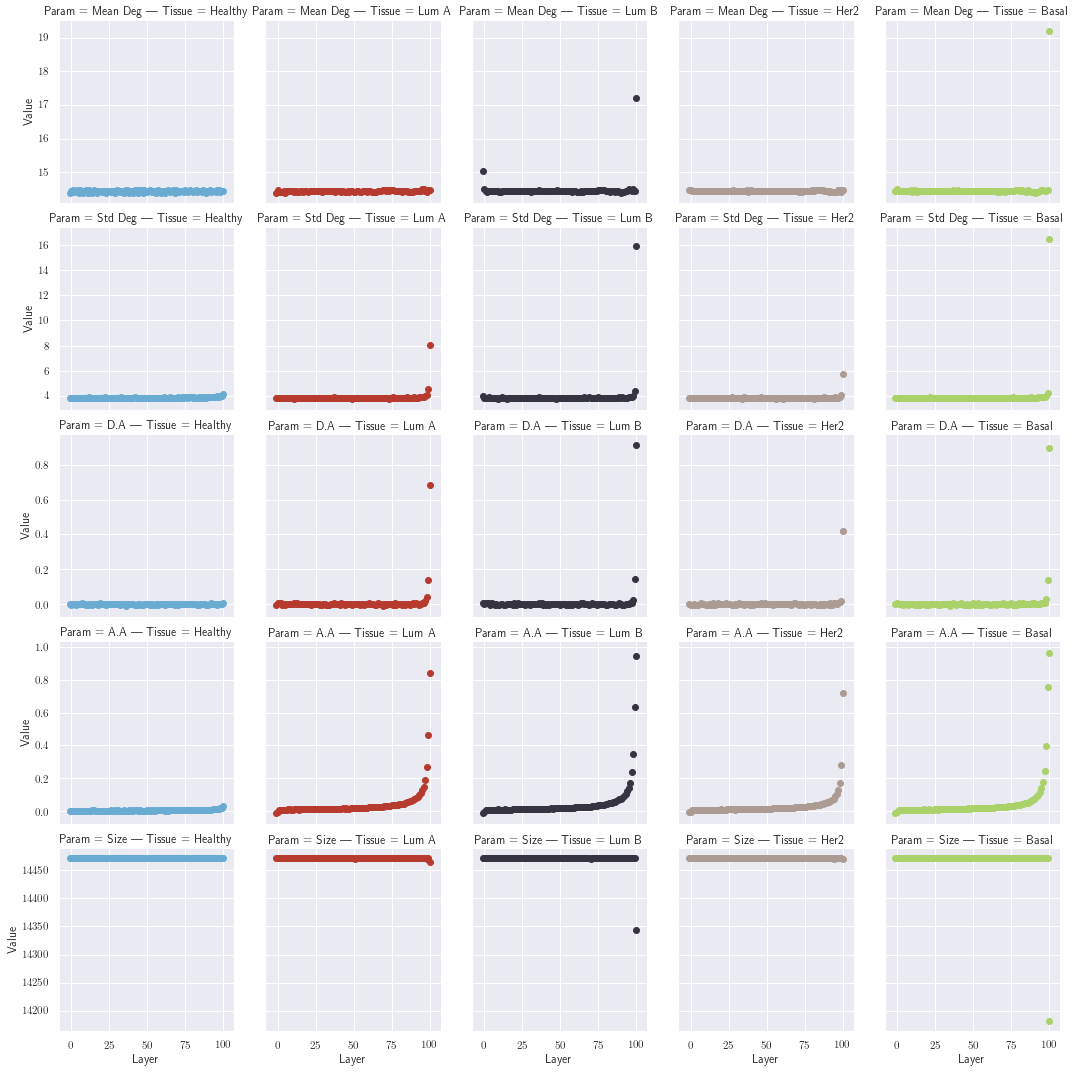

In [40]:
g = sns.FacetGrid(df_sbm, col="Tissue", row="Param", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(plt.scatter, "Layer", "Value")

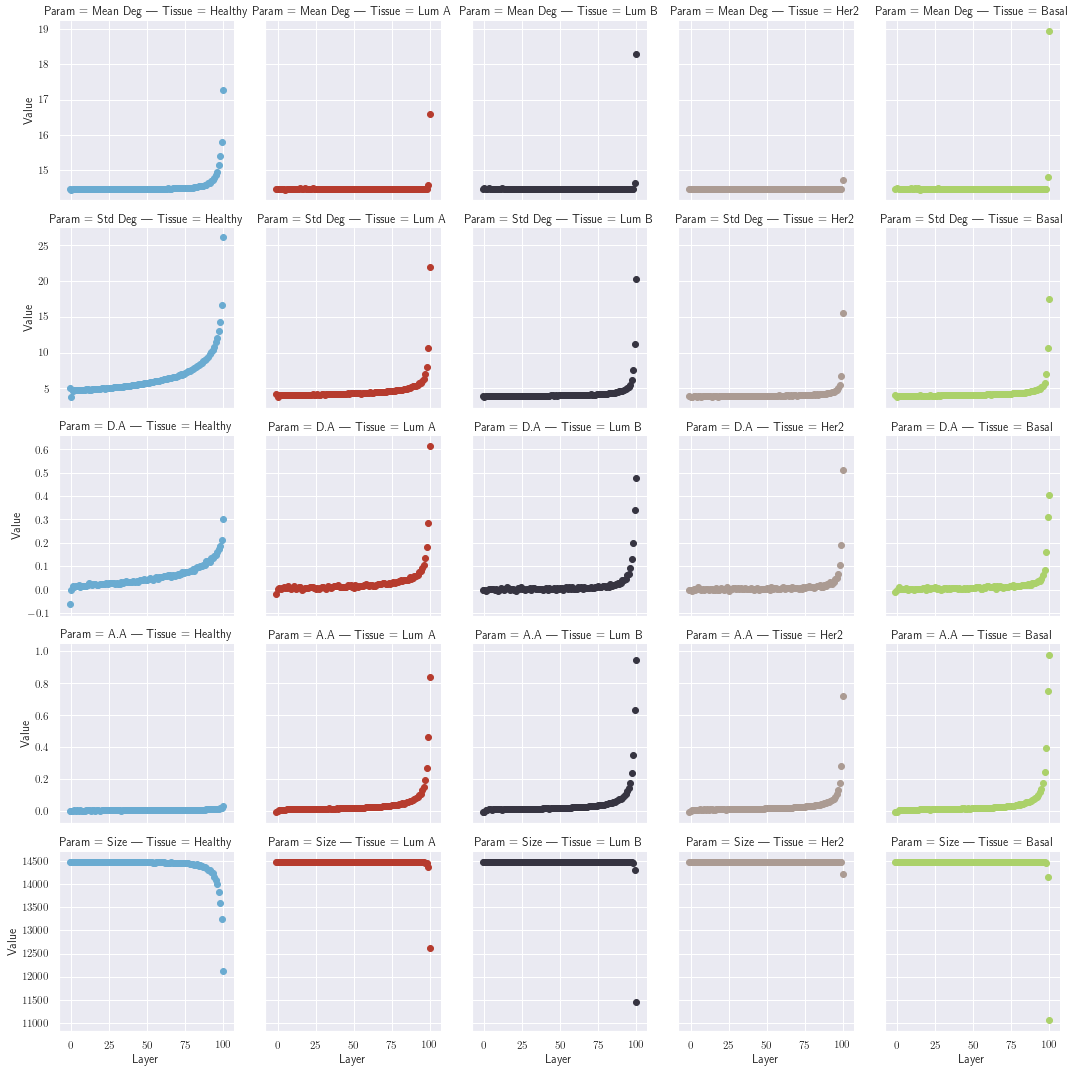

In [25]:
g = sns.FacetGrid(df_real, col="Tissue", row="Param", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(plt.scatter, "Layer", "Value")

# Two reg plots

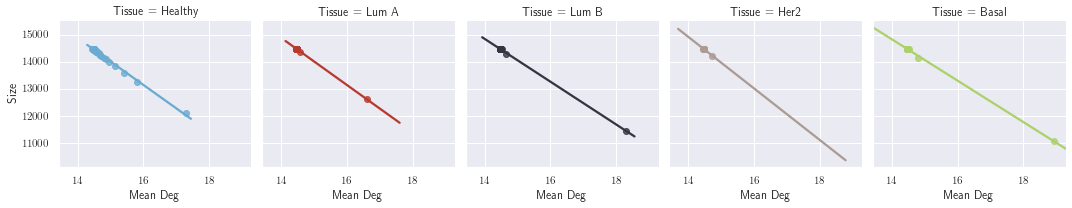

In [45]:
g = sns.FacetGrid(real, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'Mean Deg', 'Size', ci=None)

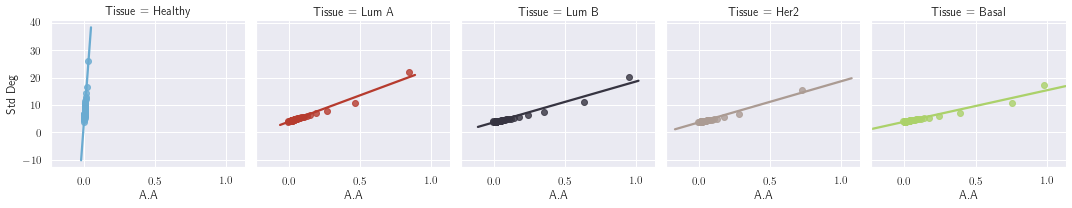

In [46]:
g = sns.FacetGrid(real, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'A.A', 'Std Deg', ci=None)

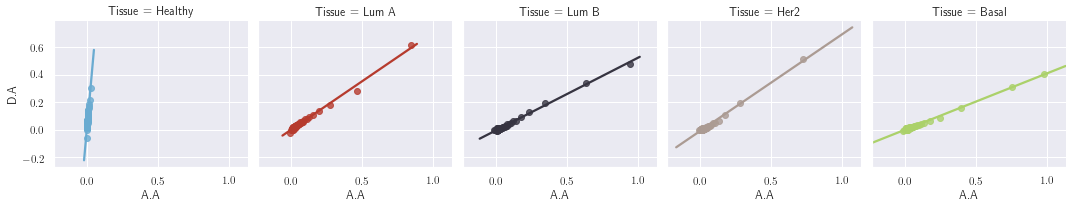

In [47]:
g = sns.FacetGrid(real, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'A.A', 'D.A', ci=None)

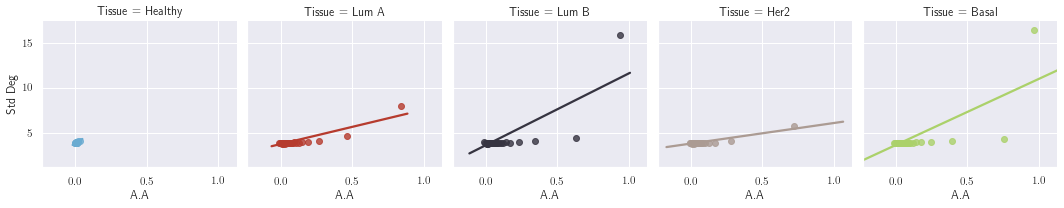

In [50]:
g = sns.FacetGrid(df_sbm, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'A.A', 'Std Deg', ci=None)

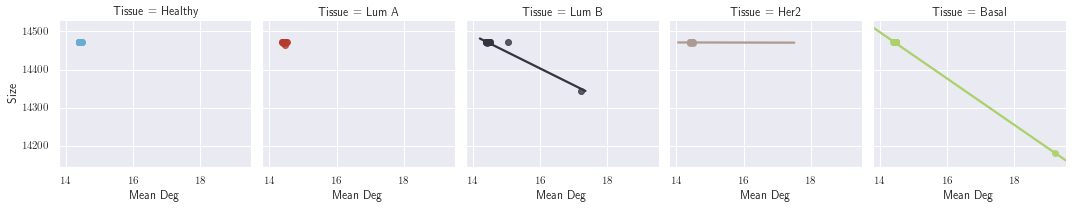

In [49]:
g = sns.FacetGrid(df_sbm, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'Mean Deg', 'Size', ci=None)

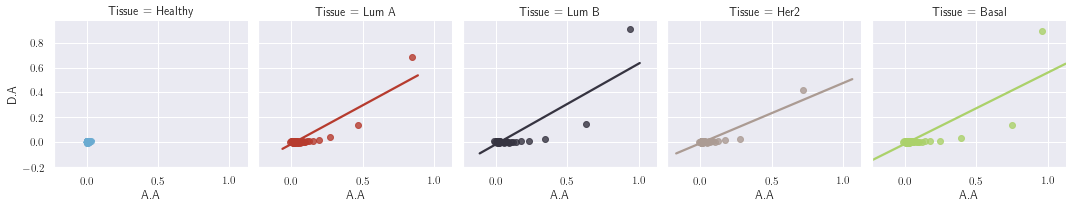

In [48]:
g = sns.FacetGrid(df_sbm, col="Tissue", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(sns.regplot, 'A.A', 'D.A', ci=None)